In [1]:
import mysql.connector
from IPython.display import Image
from datetime import datetime

## Connect and Create DB

In [6]:
# Test connection
db = mysql.connector.connect(host="localhost", user="", passwd="")

In [58]:
mycursor = db.cursor()

In [22]:
mycursor.execute("CREATE DATABASE testdb")

In [2]:
# Conntect with created DB
db = mysql.connector.connect(host="localhost", user="", passwd="", database="testdb")
mycursor = db.cursor()

## Creating Tables, Inserting & Selecting

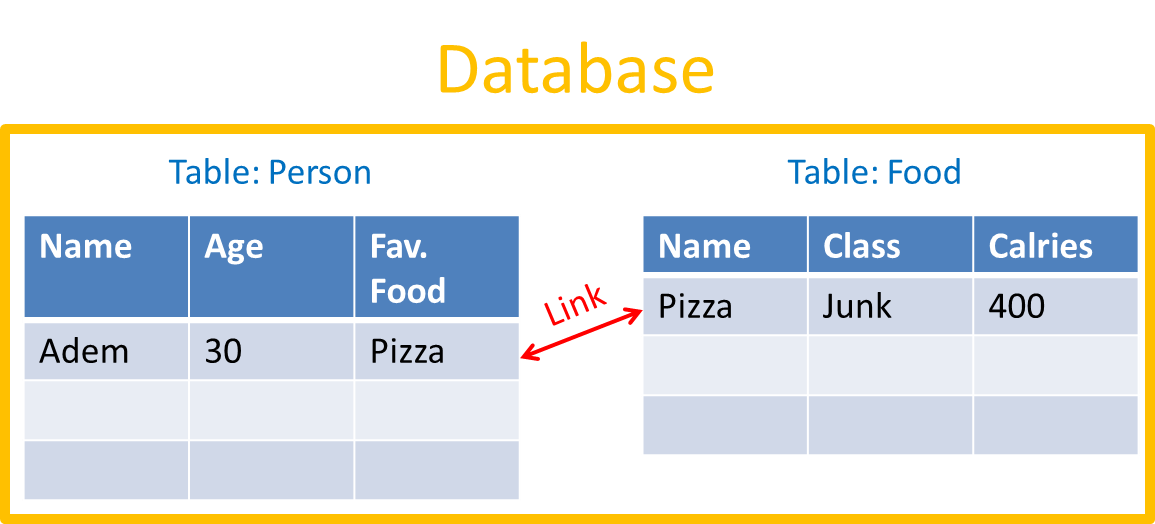

In [24]:
Image("db_table_link.png")

In [31]:
# VARCHAR(50) = String with 50 letters
# smallint ~ int16
# PRIMARY KEY = unique number
# AUTO_INCREMENT = genereate automaticly a new number
mycursor.execute("CREATE TABLE Person (Name VARCHAR(50), Age smallint UNSIGNED, PersonID int PRIMARY KEY AUTO_INCREMENT)")

In [26]:
mycursor.execute("DESCRIBE Person")
for x in mycursor:
    print(x)

('Name', 'varchar(50)', 'YES', '', None, '')
('Age', 'smallint unsigned', 'YES', '', None, '')
('PersonID', 'int', 'NO', 'PRI', None, 'auto_increment')


In [27]:
#(%s, %s) = to formate the inserts as string
mycursor.execute("INSERT INTO Person (Name, Age) VALUES (%s, %s)", ("Adem", 30))
db.commit()

In [28]:
mycursor.execute("SELECT * FROM Person")
for x in mycursor:
    print(x)

('Adem', 30, 1)
('Abdel', 28, 2)
('Adem', 30, 3)


In [29]:
mycursor.execute("INSERT INTO Person (Name, Age) VALUES (%s, %s)", ("Abdel", 28))
db.commit()

In [30]:
mycursor.execute("SELECT * FROM Person")
for x in mycursor:
    print(x)

('Adem', 30, 1)
('Abdel', 28, 2)
('Adem', 30, 3)
('Abdel', 28, 4)


## Selecting Data & Alterting Tables

In [33]:
mycursor.execute("CREATE TABLE Test (Name varchar(50) NOT NULL, Created datetime NOT NULL, Gender ENUM('M', 'F', 'O') NOT NULL, ID int PRIMARY KEY NOT NULL AUTO_INCREMENT)")

In [39]:
mycursor.execute("INSERT INTO Test (Name, Created, Gender) VALUES (%s,%s,%s)", ("Manu", datetime.now(), "M"))
db.commit()

In [40]:
mycursor.execute("SELECT * FROM Test WHERE Gender = 'M'" )
for x in mycursor:
    print(x)

('Adem', datetime.datetime(2024, 3, 31, 16, 34, 19), 'M', 1)
('Manu', datetime.datetime(2024, 3, 31, 16, 36, 38), 'M', 3)


In [42]:
mycursor.execute("SELECT * FROM Test WHERE Gender = 'M' ORDER BY ID DESC" )
for x in mycursor:
    print(x)

('Manu', datetime.datetime(2024, 3, 31, 16, 36, 38), 'M', 3)
('Adem', datetime.datetime(2024, 3, 31, 16, 34, 19), 'M', 1)


In [43]:
mycursor.execute("SELECT ID FROM Test WHERE Gender = 'M' ORDER BY ID DESC" )
for x in mycursor:
    print(x)

(3,)
(1,)


In [44]:
mycursor.execute("SELECT ID, Name FROM Test WHERE Gender = 'M' ORDER BY ID DESC" )
for x in mycursor:
    print(x)

(3, 'Manu')
(1, 'Adem')


## Modify Table

In [6]:
# Add column
mycursor.execute("ALTER TABLE Test ADD COLUMN Food VARCHAR(50) NOT NULL")

In [62]:
mycursor.execute("DESCRIBE Test")
print(mycursor.fetchone()) # returns only first entry

('Name', 'varchar(50)', 'NO', '', None, '')


In [61]:
mycursor.execute("DESCRIBE Test")
for x in mycursor:
    print(x)

('Name', 'varchar(50)', 'NO', '', None, '')
('Created', 'datetime', 'NO', '', None, '')
('Gender', "enum('M','F','O')", 'NO', '', None, '')
('ID', 'int', 'NO', 'PRI', None, 'auto_increment')
('Food', 'varchar(50)', 'NO', '', None, '')


In [7]:
# Drop column
mycursor.execute("ALTER TABLE Test DROP Food")

In [8]:
mycursor.execute("DESCRIBE Test")
for x in mycursor:
    print(x)

('Name', 'varchar(50)', 'NO', '', None, '')
('Created', 'datetime', 'NO', '', None, '')
('Gender', "enum('M','F','O')", 'NO', '', None, '')
('ID', 'int', 'NO', 'PRI', None, 'auto_increment')


In [9]:
# Change name of column
# VARCHAR(50) -  cant be samaller then the smallest entry. In this case 4 because name Adem and Manu have 4 letters
mycursor.execute("ALTER TABLE Test CHANGE Name first_name VARCHAR(50)")
mycursor.execute("DESCRIBE Test")
for x in mycursor:
    print(x)

('first_name', 'varchar(50)', 'YES', '', None, '')
('Created', 'datetime', 'NO', '', None, '')
('Gender', "enum('M','F','O')", 'NO', '', None, '')
('ID', 'int', 'NO', 'PRI', None, 'auto_increment')


## Foreign Keys & Relating Tables

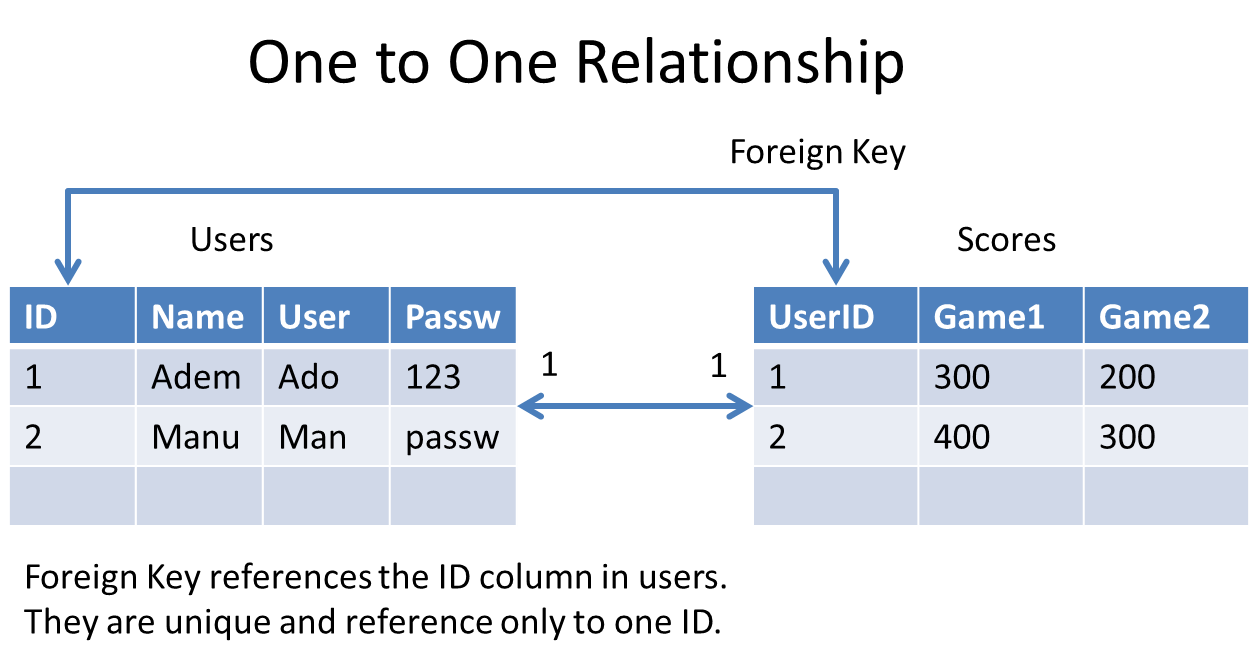

In [10]:
Image("One_to_One.png")

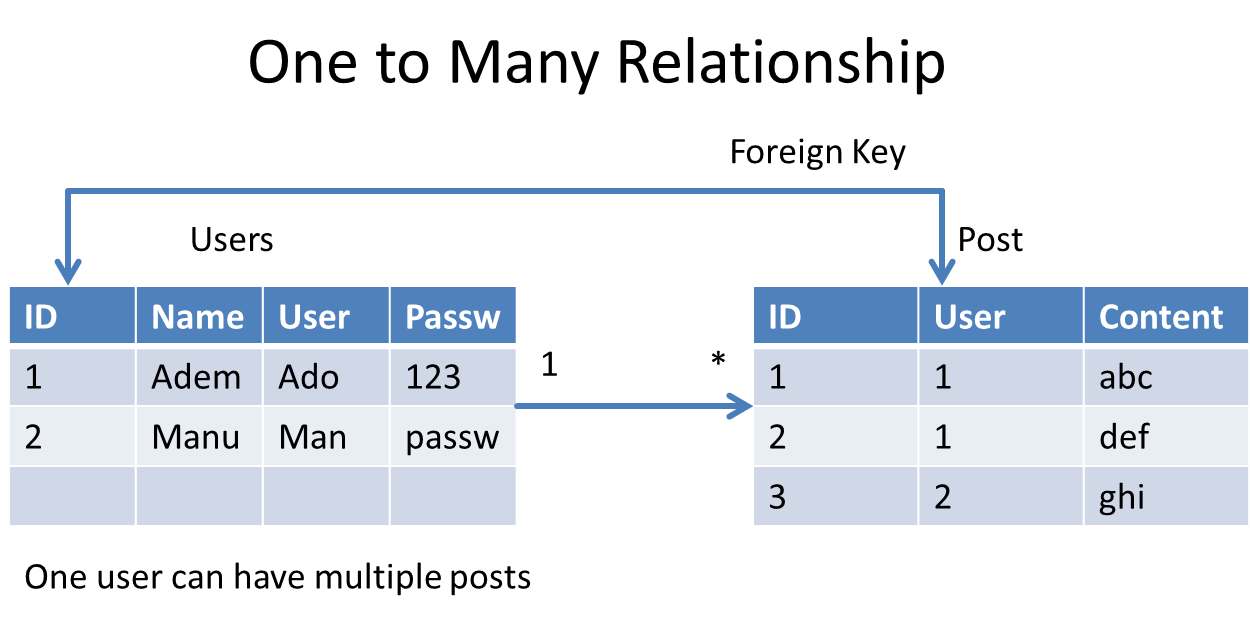

In [11]:
Image("One_to_Many.png")

In [24]:
users = [("Adem", "adem123"),
         ("Manu", "manu123"),
         ("Abdel", "abde123")]

In [13]:
user_scores = [(45, 100), (30, 200), (46,124)]

In [16]:
Q1 = "CREATE TABLE Users (id int PRIMARY KEY AUTO_INCREMENT, name VARCHAR(50), passwd VARCHAR(50))"
Q2 = "CREATE TABLE Scores (userId int PRIMARY KEY, FOREIGN KEY(userId) REFERENCES Users(id), game1 int DEFAULT 0, game2 int DEFAULT 0)"

In [18]:
mycursor.execute(Q1)
mycursor.execute(Q2)

In [19]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)

('person',)
('scores',)
('test',)
('users',)


In [28]:
Q3 = "INSERT INTO Users (name, passwd) VALUES (%s, %s)"
Q4 = "INSERT INTO Scores (userId, game1, game2) VALUES (%s, %s, %s)"

In [30]:
for x, user in enumerate(users):
    mycursor.execute(Q3, user)
    last_id = mycursor.lastrowid # give the last inserted id
    mycursor.execute(Q4, (last_id,) + user_scores[x]) # (id, game1, game2)
    
db.commit()

In [31]:
mycursor.execute("SELECT * FROM Users")
for x in mycursor:
    print(x)

(1, 'Adem', 'adem123')
(2, 'Adem', 'adem123')
(3, 'Manu', 'manu123')
(4, 'Abdel', 'abde123')


In [32]:
mycursor.execute("SELECT * FROM Scores")
for x in mycursor:
    print(x)

(2, 45, 100)
(3, 30, 200)
(4, 46, 124)
